Epoch 1/100
48/48 [==============================] - 75s 2s/step - loss: 0.4301 - accuracy: 0.8537 - val_loss: 0.6216 - val_accuracy: 0.8253
Epoch 2/100
48/48 [==============================] - 72s 2s/step - loss: 0.1563 - accuracy: 0.9498 - val_loss: 2.5112 - val_accuracy: 0.4043
Epoch 3/100
48/48 [==============================] - 68s 1s/step - loss: 0.1089 - accuracy: 0.9671 - val_loss: 2.4028 - val_accuracy: 0.4043
Epoch 4/100
48/48 [==============================] - 66s 1s/step - loss: 0.0860 - accuracy: 0.9769 - val_loss: 1.6857 - val_accuracy: 0.4107
Epoch 5/100
48/48 [==============================] - 68s 1s/step - loss: 0.0637 - accuracy: 0.9811 - val_loss: 1.8167 - val_accuracy: 0.4707
Epoch 6/100
48/48 [==============================] - 79s 2s/step - loss: 0.0511 - accuracy: 0.9870 - val_loss: 3.6332 - val_accuracy: 0.4069
Epoch 7/100
48/48 [==============================] - 76s 2s/step - loss: 0.0544 - accuracy: 0.9863 - val_loss: 0.1601 - val_accuracy: 0.9401
Epoch 8/100
4

Epoch 59/100
48/48 [==============================] - 71s 1s/step - loss: 0.0262 - accuracy: 0.9925 - val_loss: 0.0176 - val_accuracy: 0.9962
Epoch 60/100
48/48 [==============================] - 74s 2s/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.0263 - val_accuracy: 0.9962
Epoch 61/100
48/48 [==============================] - 71s 1s/step - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.0564 - val_accuracy: 0.9783
Epoch 62/100
48/48 [==============================] - 74s 2s/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0484 - val_accuracy: 0.9847
Epoch 63/100
48/48 [==============================] - 75s 2s/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0212 - val_accuracy: 0.9974
Epoch 64/100
48/48 [==============================] - 75s 2s/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0219 - val_accuracy: 0.9974
Epoch 65/100
48/48 [==============================] - 71s 1s/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 

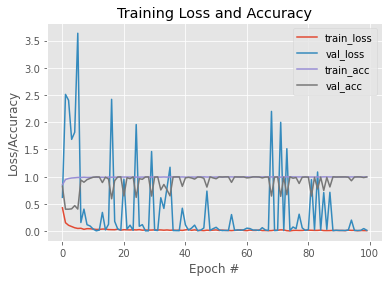

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


epochs = 100
learning_rate = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

#Dataset papkani ko'rsatish.Yani Dataset ichida "Glass" va "without Glass" papkalari bor                                        
image_files = [f for f in glob.glob(r'Dataset' + "/**/*", recursive=True)\
               if not os.path.isdir(f)]
random.shuffle(image_files)


for img in image_files:

    image = cv2.imread(img)
    image = cv2.resize(image,(img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] 
    
    #Agar natija model without glassga tushsa labelga 1 ni uzatadi. 1 indexni Aks holda 0 .
    if label == "without_glass":
        label = 1
    else:
        label = 0
        
    labels.append([label])


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) 
testY = to_categorical(testY, num_classes=2)


aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": 
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model


model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)


opt = Adam(learning_rate=learning_rate, decay=learning_rate/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)
            
#Modelni saqlash. agar "h5" qismini yozmasak papka qilib soxranit qiladi
model.save('glass_Murodil.model',save_format='h5')


plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")


plt.savefig('plot.png')
